<a href="https://colab.research.google.com/github/FelipeMoraes03/aprendizado_supervisionado/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importação de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, train_test_split, RandomizedSearchCV

#Coleta e tratamento dos dados

In [2]:
#Coletando os dados
cvd = pd.read_csv('/covid_dataset.csv')

In [3]:
#Substituindo os valores por inteiros
cvd = cvd.replace({"Yes": 1, "No": 0})

#Salvando o DataFrame modificado em um novo arquivo CSV
cvd.to_csv("covid_new.csv", index=False)

In [4]:
#Coletando os dados do novo dataset
cvd = pd.read_csv('covid_new.csv')

In [5]:
# Selecionando os valores
values = cvd.iloc[:, :-1].values

# Selecionando a label
labels = cvd.iloc[:, -1:].values

In [6]:
#Dividindo o conjunto em treino e teste
values_train, values_test, labels_train, labels_test = train_test_split(values, labels, test_size=0.3)

#Selecionando os melhores parâmetros

In [7]:
#Parâmetros para serem testados
params = {'criterion' : ["gini", "log_loss", "entropy"],
          'splitter': ["random", "best"],
          'max_depth': [2, 4, 6, 8, 10, 12, 15, 20, 25, 30, 35, 40, 45, 50],
          'min_samples_split': [i for i in range(2, 21) if i % 2 == 0],
          'min_samples_leaf': [i for i in range(2, 21) if i % 2 == 0],
          'max_features': ['sqrt', 'log2', None]}

In [8]:
decision_tree = DecisionTreeClassifier()

In [9]:
#Utilizando o Randomized Search para verificar quais os melhores parâmetros com 5000 iterações
random_search = RandomizedSearchCV(decision_tree, params, n_iter=5000)
random_search.fit(values_train, labels_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(), n_iter=5000,
                   param_distributions={'criterion': ['gini', 'log_loss',
                                                      'entropy'],
                                        'max_depth': [2, 4, 6, 8, 10, 12, 15,
                                                      20, 25, 30, 35, 40, 45,
                                                      50],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [2, 4, 6, 8, 10, 12,
                                                             14, 16, 18, 20],
                                        'min_samples_split': [2, 4, 6, 8, 10,
                                                              12, 14, 16, 18,
                                                              20],
                                        'splitter': ['random', 'best']})

In [10]:
#Verificando os melhores parâmetros selecionados
best_paramsR = random_search.best_params_
print(f"Best Params: {best_paramsR}")

Best Params: {'splitter': 'best', 'min_samples_split': 8, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 15, 'criterion': 'gini'}


In [11]:
#Criando a Decision Tree com os parâmetros selecionados pelo Random Search
best_model = DecisionTreeClassifier(**best_paramsR)
best_model.fit(values_train, labels_train)

#Utilizando o modelo treinado para prever as labels do conjunto de testes
labels_prediction = best_model.predict(values_test)

#Verificando a accuracy
accuracy = accuracy_score(labels_test, labels_prediction)

#Imprimindo a accuracy do modelo
print(f"Accuracy: {round((accuracy*100), 2)}%")

Accuracy: 97.61%


#Melhor modelo de árvore de decisão para nosso dataset 

In [12]:
#Printando parâmetros do melhor modelo
print(f"Estratégia de divisão: {best_paramsR['splitter']}")
print(f"Min amostras para dividir: {best_paramsR['min_samples_split']}")
print(f"Min amostras para ser folha: {best_paramsR['min_samples_leaf']}")
print(f"Max variáveis: {best_paramsR['max_features']}")
print(f"Criterion: {best_paramsR['criterion']}")
print(f"Profundidade máxima: {best_paramsR['max_depth']}")
print(f"Accuracy do modelo: {round(accuracy, 4)}")

Estratégia de divisão: best
Min amostras para dividir: 8
Min amostras para ser folha: 2
Max variáveis: sqrt
Criterion: gini
Profundidade máxima: 15
Accuracy do modelo: 0.9761


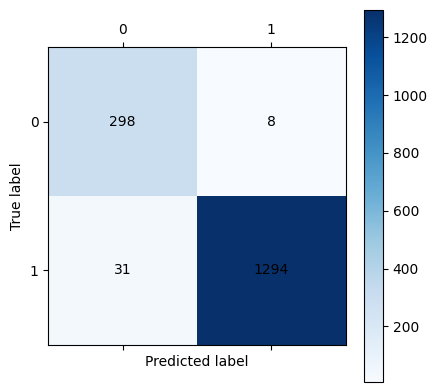

In [13]:
#Criando uma matriz de confusão para esse modelo
cm = confusion_matrix(labels_test, labels_prediction)

plt.matshow(cm, cmap=plt.cm.Blues)

#Adicionanando rótulos aos eixos x e y
classes = ['0', '1']
plt.xticks(np.arange(len(classes)), classes)
plt.yticks(np.arange(len(classes)), classes)
plt.xlabel('Predicted label')
plt.ylabel('True label')

# Adicionar as contagens de ocorrência em cada célula da matriz
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(cm[i][j]), horizontalalignment='center', verticalalignment='center')

#Plotando a matriz de confusão
plt.colorbar()
plt.show()

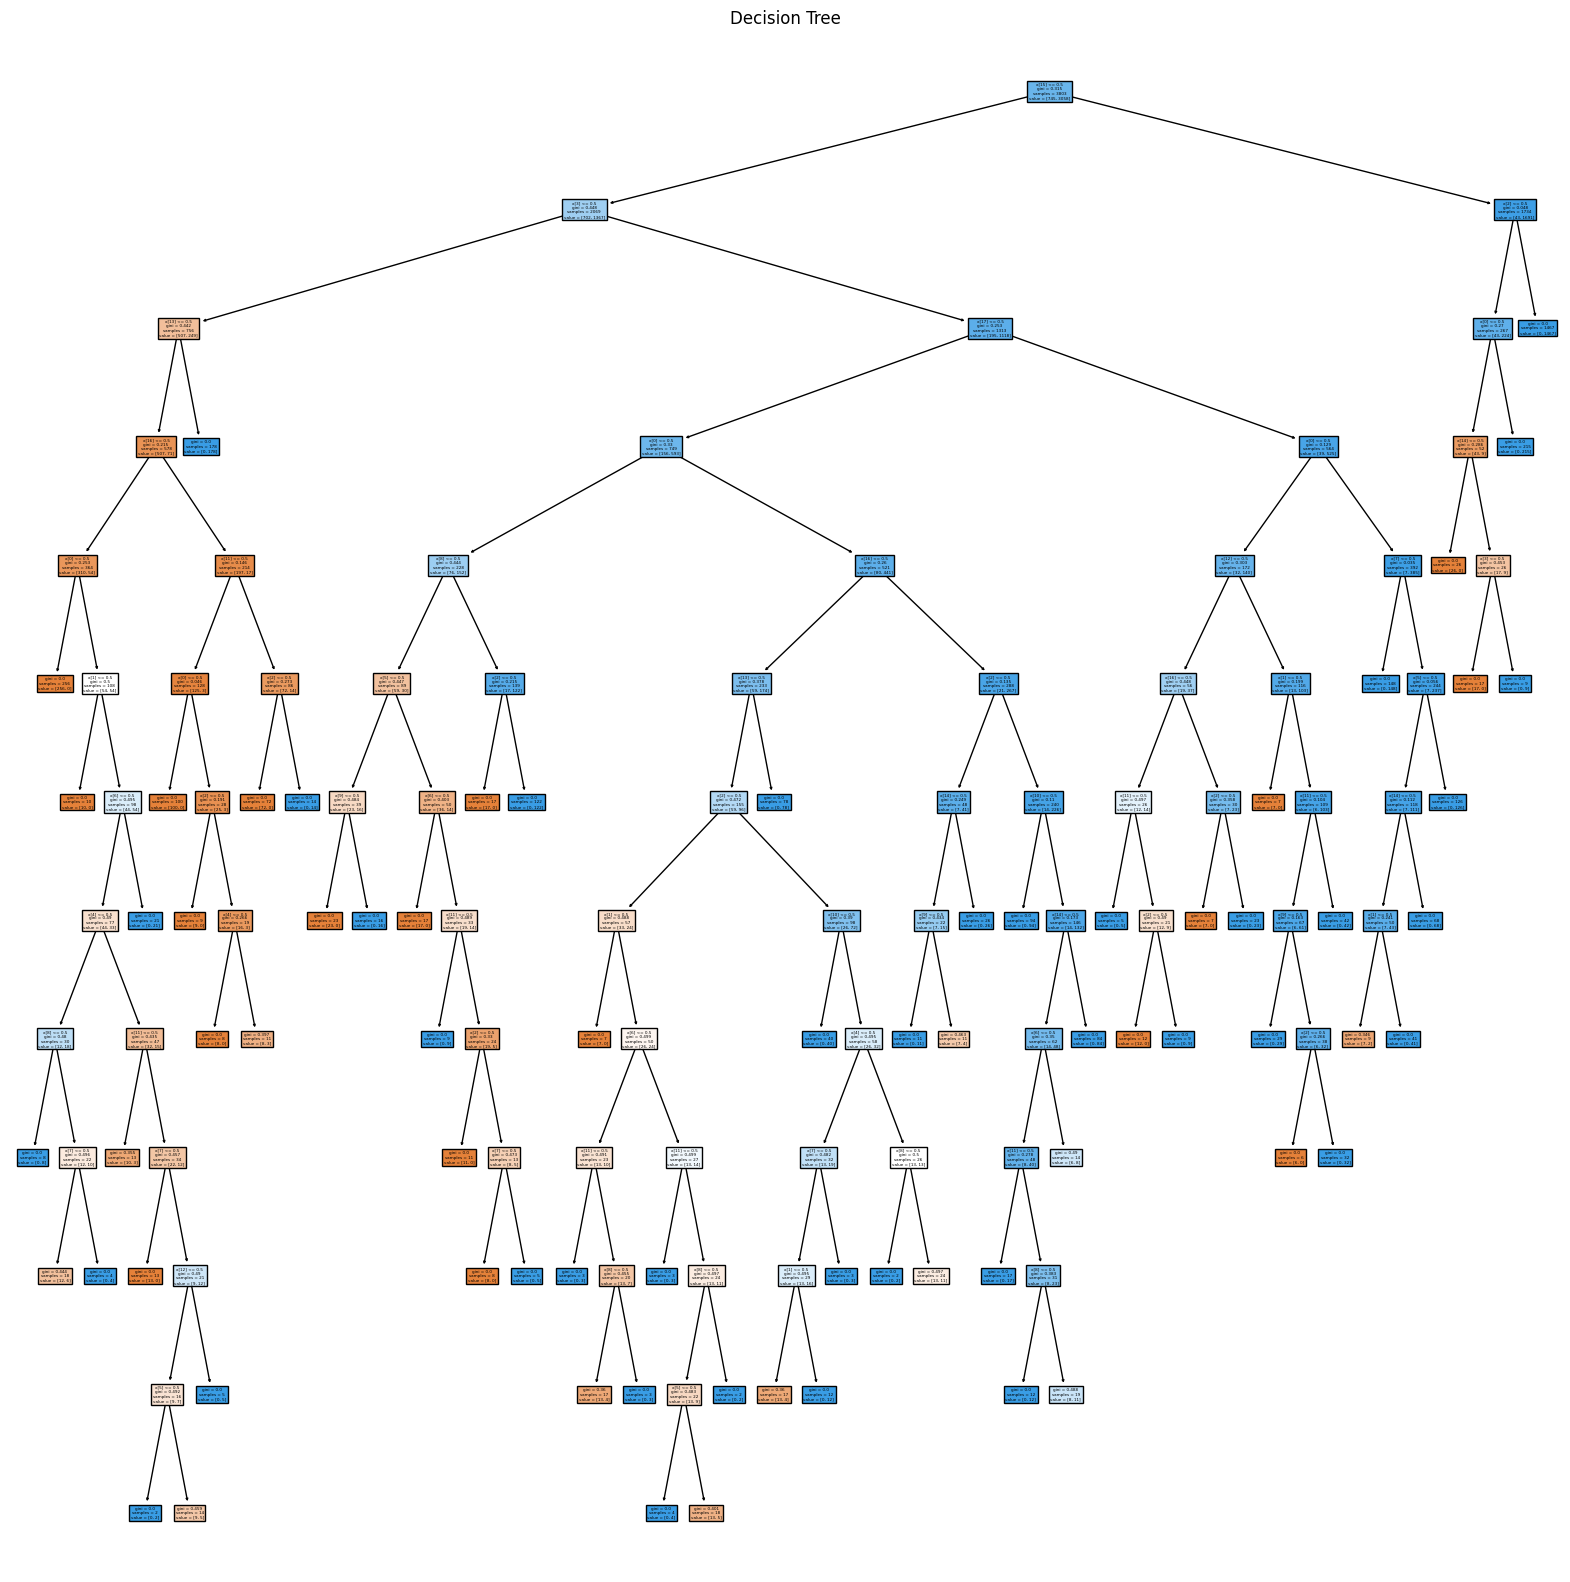

In [14]:
#Plotando o gráfico da decision tree
plt.figure(figsize=(20, 20))
plot_tree(best_model, filled=True)
plt.title(f"Decision Tree")
plt.show()